# **Welcome to the Notebook**

### Let's mount the google drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [2]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 44.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=f4c839c6e44a9d035f79e91ac9ee345336a0b6239e1eb7df5dccea9f15eb0326
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


Importing the modules 

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct 
import matplotlib.pyplot as plts

creating spark session

In [4]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [5]:
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)

let's check the data:

In [7]:
listening_df.show(10)

+-----------+-------------+--------------------+------------+--------------------+
|    user_id|         date|               track|      artist|               album|
+-----------+-------------+--------------------+------------+--------------------+
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|       Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|   Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000

let's delete useless columns:

In [8]:
listening_df = listening_df.drop('date')

drop the null rows:

In [9]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [10]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [11]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [12]:
shape = (listening_df.count(),len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [13]:
q0 = listening_df.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [15]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [20]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count'))
q2.orderBy(desc('count')).limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [22]:
q3 = listening_df\
.select('artist','track')\
.groupby('artist','track')\
.agg(count('track').alias('count'))\
.orderBy(desc('count')).limit(10)
q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [24]:
listening_df.select('track')\
.filter(listening_df.artist == 'Rihanna')\
.groupBy('track').agg(count('track').alias('count'))\
.orderBy(desc('count')).limit(10).show()

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Desperado|  679|
+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [25]:
listening_df.select('artist','album')\
.groupBy('artist','album').agg(count('*').alias('count'))\
.orderBy(desc('count')).limit(10).show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [26]:
genre_csv_path  = '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)

let's check the data

In [27]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

**Query #6**

find top 10 users who are fan of ***pop*** music

In [29]:
data = listening_df.join(genre_df, how = 'inner', on=['artist'])
data.select('user_id').filter(data.genre == 'pop').groupBy('user_id').agg(count('*').alias('count'))\
.orderBy(desc('count')).limit(10).show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [31]:
data.select('genre')\
.groupBy('genre').agg(count('*').alias('count'))\
.orderBy(desc('count')).limit(10).show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [33]:
q8_1 = data.select('user_id','genre')\
.groupBy('user_id','genre').agg(count('*').alias('count'))\
.orderBy('user_id',desc('count'))
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|           classical|   31|
| --Seph|                rock|   27|
| --Seph|          indie rock|   15|
| --Seph|               opera|   12|
| --Seph|                folk|   10|
| --Seph|                 pop|    9|
| --Seph|               Bjorn|    8|
| --Seph|             hip hop|    7|
| --Seph|             ambient|    6|
| --Seph|          electronic|    6|
| --Seph|             Hittman|    4|
| --Seph|            King Mez|    4|
| --Seph|                 RBX|    4|
| --Seph|               Ruben|    4|
| --Seph|              Xzibit|    4|
| --Seph|    The Lady of Rage|    4|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|      Kendrick Lamar|    4|
| --Seph|          snoop dogg|    4|
| --Seph|          Snoop Dogg|    4|
+-------+--------------------+-----+
only showing top 20 rows



In [40]:
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'),col('genre')))).alias('max')
q8_2.show()

+---------------+-------------------------+
|        user_id|max(struct(count, genre))|
+---------------+-------------------------+
|      --Shinn--|              {112, rock}|
|       --ollz--|               {47, rock}|
|     -Amnesiac-|             {323, metal}|
|         -Bish-|               {59, rock}|
|        -Danni-|               {45, rock}|
|          -DeWp|            {82, hip hop}|
|      -Faction-|               {56, rock}|
|-February-Star-|               {74, rock}|
|        -Gemma-|        {38, british pop}|
|   -Gingergirl-|                {28, pop}|
|        -Hazel-|           {14, synthpop}|
|        -Heiko-|         {43, electronic}|
|         -Katie|              {58, lo-fi}|
|      -Krystal-|               {87, rock}|
|         -Mark-|         {37, indie rock}|
|       -Mullet-|          {60, metalcore}|
|          -Robs|               {38, rock}|
| -SleepingStar-|        {57, black metal}|
|      -Stifler-|              {144, rock}|
|  -Toxic-Waste-|          {55, 

**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [65]:
q9 = data.select('genre')\
.filter((col('genre')=='pop')|(col('genre')=='rock')|(col('genre')=='metal')|(col('genre')=='hip hop'))\
.groupby('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-------+
|  genre|  count|
+-------+-------+
|    pop|1544747|
|hip hop| 532984|
|  metal| 208107|
|   rock|2691934|
+-------+-------+



Now, let's visualize the results using ***matplotlib***

In [66]:
q9_list = q9.collect()

In [67]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [68]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[1544747, 532984, 208107, 2691934]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

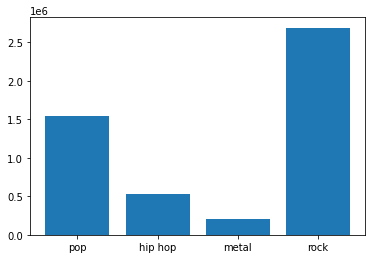

In [70]:
import matplotlib.pyplot as plt
plt.bar(labels,counts)